### Part A: Model Code 

In [1]:
#imports
import numpy as np
import pandas as pd

In [2]:
#5
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1-vec2)

In [3]:
#6
def manhattan_distance(vec1, vec2):
    vector_abs = np.abs(vec1-vec2)
    return np.sum(vector_abs)

In [4]:
#7
def accuracy_calc(predicted, actual):
    accuracy = np.sum(predicted == actual)
    return accuracy/len(actual)
def generalization_error(predicted, actual):
    accuracy = np.sum(predicted == actual)
    return 1-(accuracy/len(actual))

In [5]:
#8
def precision(predicted, actual):
    tp = 0
    fp = 0
    for i in range(0, len(predicted)):
        if predicted[i] == actual[i] and actual[i] == 1:
            tp += 1
        elif predicted[i] != actual[i] and actual[i] == 0:
            fp += 1
    if (tp + fp) == 0:
        return 0
    
    return tp/(tp + fp)

def recall(predicted, actual):
    tp = 0
    fn = 0
    for i in range(0, len(predicted)):
        if predicted[i] == actual[i] and actual[i] == 1:
            tp += 1
        elif predicted[i] != actual[i] and actual[i] == 1:
            fn += 1
    if (tp + fn) == 0:
        return 0
    
    return tp/(tp + fn)

def f1_score(predicted, actual):
    rec = recall(predicted, actual)
    prec = precision(predicted, actual)
    if (prec + rec) == 0:
        return 0
    
    return 2*((prec*rec)/(prec+rec))

In [6]:
#9
def confusion_matrix(predicted, actual):
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    for i in range(0, len(predicted)):
        if predicted[i] == actual[i] and actual[i] == 0:
            tn += 1
        elif predicted[i] == actual[i] and actual[i] == 1:
            tp += 1
        elif predicted[i] != actual[i] and actual[i] == 0:
            fp += 1
        elif predicted[i] != actual[i] and actual[i] == 1:
            fn += 1
            
    return np.array([[tn, fp],[fn, tp]])

In [7]:
#10
def roc_curve(true_classes, class_probabilities):
    """Given true classes and class probabilities calculates fpr and tpr values and returns them as lists that can be used to construct a ROC curve"""
    true_classes, class_probabilities = np.asarray(true_classes) , np.asarray(class_probabilities)
    tpr_values=[]
    fpr_values=[]
    for threshold in range(100):
        predicted_classes=(class_probabilities > float(threshold/100.)).astype(int)
        fpr=np.sum(predicted_classes[np.where(predicted_classes == 1 )]  != true_classes[np.where(predicted_classes == 1 )])/true_classes[np.where(true_classes == 0 )].shape[0]
        tpr=np.sum(predicted_classes[np.where(predicted_classes == 1 )]  == true_classes[np.where(predicted_classes == 1 )])/true_classes[np.where(true_classes == 1 )].shape[0]
        fpr_values.append(fpr)
        tpr_values.append(tpr)
    return fpr_values,tpr_values

In [8]:
#11
def auc(true_classes, class_probabilities):
    '''Calculates area under the roc curve by calling the roc curve function to calculate tpr and fpr'''
    x,y=roc_curve(true_classes, class_probabilities)
    auc=abs(np.trapz(y,x, axis=-1))
    return auc

In [9]:
#12
def pr_curve(true_classes, class_probabilities):
    """Given true classes and class probabilities calculates precision and recall values and returns them and the thresholds as lists that can be used to construct a PR curve"""
    true_classes, class_probabilities = np.asarray(true_classes) , np.asarray(class_probabilities)
    p_values=[]
    r_values=[]
    thresholds=[]
    for threshold in range(100):
        predicted_classes=(class_probabilities > float(threshold/100.)).astype(int)
        p=np.sum(predicted_classes[np.where(predicted_classes == 1 )]  == true_classes[np.where(predicted_classes == 1 )])/predicted_classes[np.where(predicted_classes == 1 )].shape[0]
        r=np.sum(predicted_classes[np.where(predicted_classes == 1 )]  == true_classes[np.where(predicted_classes == 1 )])/true_classes[np.where(true_classes == 1 )].shape[0]
        p_values.append(p)
        r_values.append(r)
        thresholds.append(threshold)
    return p_values,r_values, thresholds

In [10]:
#13
class KnnModel:

    def __init__(self):
        pass
    
    def fit(self, training_features, training_labels, k, distance_f, kwargs):
        self.training_features = training_features
        self.training_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        self.kwargs = kwargs
        return
    
    def predict(self, test_features, weight_option=None):
        min_distances = np.array([])
        test_labels = np.array([])
        # loop through array of test features
        for i in range(0, len(test_features)):
            pos_label_probs = np.array([])
            # loop through training features and find distances 
            distances = np.array([])
            for j in range(0, len(self.training_features)):
                if self.distance_f == 'Manhattan':
                    distances = np.append(distances, manhattan_distance(test_features[i], self.training_features[j]))
                else:
                    distances = np.append(distances, euclidean_distance(test_features[i], self.training_features[j]))                            
            # Find k min indices within distance array
            test_k_labels = np.argpartition(distances,self.k)[:self.k]
            # Get labels contained at those indices
            test_k_labels = np.take(self.training_labels, test_k_labels)
            #get distances of those indicies
            test_k_dist=np.take(distances, test_k_labels)
            #calculate probabilities depending if distance weighting is desired
            if weight_option=='IDW':
                pos_label_probs=np.append(pos_label_probs,(np.sum(test_k_labels/np.square(test_k_dist)))/(np.sum(1/np.square(test_k_dist))))
            else:
                pos_label_probs = np.append(pos_label_probs, np.sum(test_k_labels)/self.k)
            #make label prediction based on probabilities
        
            # find most frequent value and add it to test labels
            #test_labels = np.append(test_labels, np.bincount(test_k_labels).argmax())
            test_labels = np.append(test_labels, (pos_label_probs >= 0.5).astype(int))
        # return predictions
        return test_labels
    
    def test(self):
        return self.__dict__

### Part B: Data Processing

In [11]:
#14
df = pd.read_csv('./datasets/winequality-white.csv',delimiter=';')

In [12]:
#15
target = []
for row in df['quality']:
    if row > 5:
        target.append(1)
    else:
        target.append(0)

In [13]:
#16
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
#17
shuffled = df.sample(frac=1)

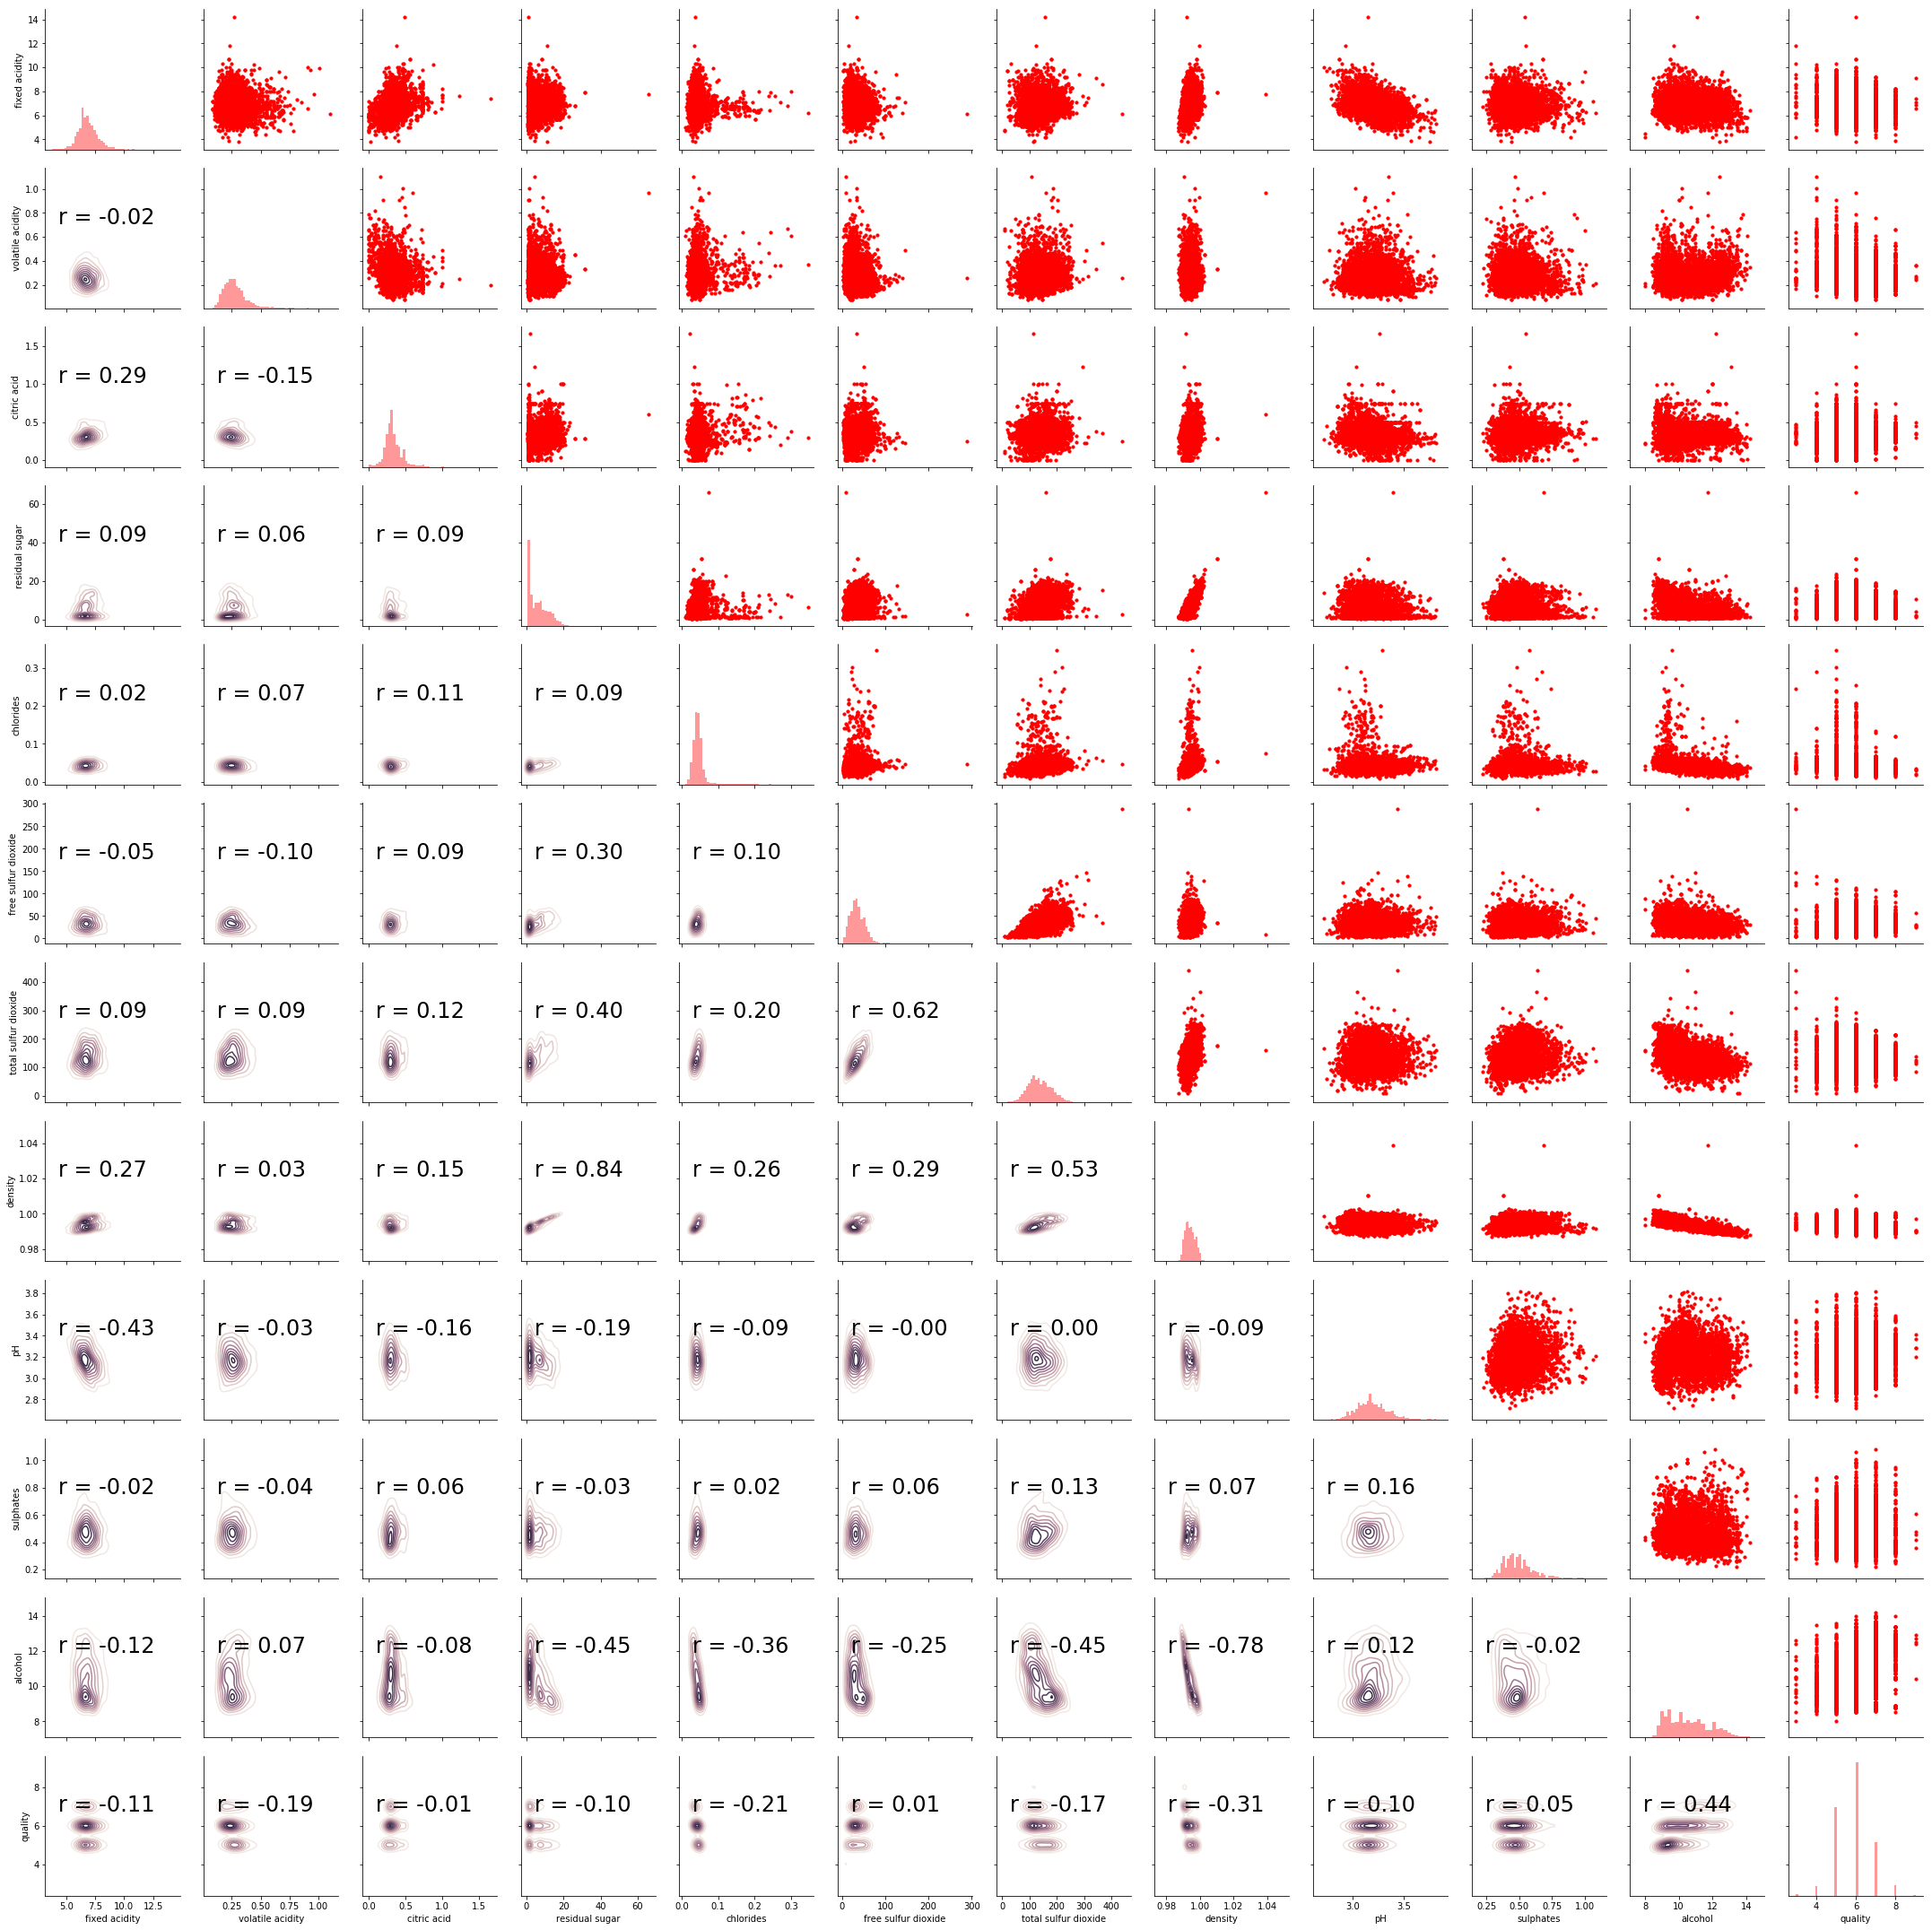

In [15]:
#18
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(shuffled)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [16]:
#19
df = df.drop(columns=['density', 'fixed acidity', 'alcohol', 'pH', 'quality'])

In [17]:
#20
def partition(feature_matrix, target_vector, t):
    last_index_taken = len(feature_matrix) - int(round(len(feature_matrix) * t))
    X_train = feature_matrix[0:last_index_taken,:]
    X_test = feature_matrix[last_index_taken:len(feature_matrix), :]
    y_train = target_vector[0:last_index_taken]
    y_test = target_vector[last_index_taken:len(target_vector)]
    return X_train, X_test, y_train, y_test

In [18]:
#21
#unscaled model
X_train, X_test, y_train, y_test = partition(df.values, target, 0.2)
knn = KnnModel()
knn.fit(training_features=X_train, training_labels=y_train, k=5, distance_f='Euclidean', kwargs=dict())
y_test_predicted = knn.predict(test_features=X_test)

In [19]:
#21a
accuracy= accuracy_calc(y_test_predicted, y_test)
f1score = f1_score(y_test_predicted, y_test)
print('Unscaled Model')
print('Accuracy:',accuracy)
print('F1 Score:',f1score)

Unscaled Model
Accuracy: 0.6836734693877551
F1 Score: 0.7873799725651578


In [20]:
#21b
def scale(matrix, mean, std):
    for i in range(0, len(mean)):
        for j in range(0, len(matrix)):
            matrix[j, i] = (matrix[j,i] - mean[i])/std[i]
            
    return matrix

X_train, X_test, y_train, y_test = partition(df.values, target, 0.2)
        
mean = X_train.mean(0)
std = X_train.std(0)
#print(mean)
#print(std)
X_train = scale(X_train, mean, std)
X_test = scale(X_test, mean, std)

In [21]:
#21c
knn = KnnModel()
knn.fit(training_features=X_train, training_labels=y_train, k=5, distance_f=None, kwargs=dict())

y_test_predicted = knn.predict(test_features=X_test)


In [22]:
accuracy= accuracy_calc(y_test_predicted, y_test)
f1score = f1_score(y_test_predicted, y_test)
print('Scaled Model')
print('Accuracy:',accuracy)
print('F1 Score:',f1score)

Scaled Model
Accuracy: 0.7510204081632653
F1 Score: 0.8271954674220963


In [23]:
#21e
knn = KnnModel()
knn.fit(training_features=X_train, training_labels=y_train, k=5, distance_f=None, kwargs=dict())

y_test_predicted = knn.predict(test_features=X_test,weight_option='IDW')


In [24]:
accuracy= accuracy_calc(y_test_predicted, y_test)
f1score = f1_score(y_test_predicted, y_test)
print('Scaled Model With IDW')
print('Accuracy:',accuracy)
print('F1 Score:',f1score)

Scaled Model With IDW
Accuracy: 0.7438775510204082
F1 Score: 0.8286689419795222


### Part C: Model Evaluation

In [25]:
def kfold(folds, data, labels, model, model_args, score_function,seed=None):
    if (seed == None):
        seed=np.random.randint(1,500)
    data=np.asarray(data)
    labels=np.asarray(labels)
    np.random.seed(seed)
    np.random.shuffle(data)
    np.random.seed(seed)
    np.random.shuffle(labels)
    
    datafolds=np.array_split(data,folds)
    labelfolds=np.array_split(labels,folds)
    
    scores=[]
    true_labels=np.array([])
    predictions=np.array([])

    for fold in range(len(datafolds)):
        trainingdatafolds=np.vstack([data for k, data in enumerate(datafolds) if k not in [fold]])
        trainingdatafolds=trainingdatafolds.reshape(-1,data.shape[1])
        trainingdata=np.empty((0,data.shape[1]), int)
        trainingdata = np.append(trainingdata, trainingdatafolds, axis=0)
        
        traininglabelfolds=np.concatenate([label for k, label in enumerate(labelfolds) if k not in [fold]])
        traininglabelfolds=traininglabelfolds.reshape(-1,1)
        traininglabels=np.empty((0,1), int)
        traininglabels=np.append(traininglabels, traininglabelfolds, axis=0)
    
        testingdata=datafolds[fold]
        testinglabels=labelfolds[fold]
        
        calledmodel=model()
        calledmodel.fit(training_features=trainingdata,training_labels=traininglabels, **model_args,kwargs=dict())
        preds = calledmodel.predict(test_features=testingdata)
        score=score_function(preds,testinglabels)
        scores=np.append(scores,score)
        true_labels=np.append(labels,testinglabels)
        predictions=np.append(predictions,preds)
    
    
    results={'avgerage_score':np.mean(scores),'predicted_values':predictions, 'true_values':true_labels}

    return results

In [26]:
#23
k_values=[1,5,9, 11]
distance_type = ['Euclidean', 'Manhattan']

for k_val in  range(len(k_values)):
    for dist_type in range(len(distance_type)):     
        model_args={'k':k_values[k_val],'distance_f':distance_type[dist_type]} 
        results=kfold(5,X_train, y_train, KnnModel, model_args, f1_score,123)
        print(model_args)
        print(results['avgerage_score'])

{'k': 1, 'distance_f': 'Euclidean'}
0.819136748243465
{'k': 1, 'distance_f': 'Manhattan'}
0.6581561137352201
{'k': 5, 'distance_f': 'Euclidean'}
0.7044172212641525
{'k': 5, 'distance_f': 'Manhattan'}
0.7006059752852267
{'k': 9, 'distance_f': 'Euclidean'}
0.7400191130542404
{'k': 9, 'distance_f': 'Manhattan'}
0.7338665409361288
{'k': 11, 'distance_f': 'Euclidean'}
0.7408688436265709
{'k': 11, 'distance_f': 'Manhattan'}
0.7386817050381816


In [27]:
#24
knn = KnnModel()
knn.fit(training_features=X_train, training_labels=y_train, k=9, distance_f='Manhattan', kwargs=dict())
y_test_predicted = knn.predict(test_features=X_test)

print('Precision:', precision(y_test_predicted, y_test))
print('Recall:', recall(y_test_predicted, y_test))
print('F1 Score:', f1_score(y_test_predicted, y_test))
print('Accuracy:', accuracy_calc(y_test_predicted, y_test))
print(confusion_matrix(y_test_predicted, y_test))


Precision: 0.7103365384615384
Recall: 0.8590116279069767
F1 Score: 0.7776315789473685
Accuracy: 0.6551020408163265
[[ 51 241]
 [ 97 591]]


In [28]:
#25
#calculate confidence interval based on bootstrapping

def bootstrap_confidence(predicted,true,scorer, percent):

    """
    samples randomly from for output to create bootstraped samples of output and calculated mean performance and confidence intervals.
    
    """
    predicted=np.asarray(predicted)
    true=np.asarray(true)
    if (predicted.shape[0] != true.shape[0]):
        print("ERROR: Arrays must be the same length")
    else:
        boot_score=[]
        size = predicted.shape[0]
        split = int(percent * size)
        for i in range(30):
            np.random.seed(i)
            np.random.shuffle(predicted)
            np.random.seed(i)
            np.random.shuffle(true)
            boot_score.append(scorer(predicted[:split],true[:split]))
    
        std_error= (np.var(boot_score)/30.0)
        lower_bound=np.mean(boot_score)-(1.96)*std_error
        upper_bound=np.mean(boot_score)+(1.96)*std_error
        confidence=abs(upper_bound-lower_bound)/2
        
    return confidence

print('confident in accuracy by +/-' ,bootstrap_confidence(y_test_predicted,y_test,accuracy_calc,0.1))



confident in accuracy by +/- 0.00014872260015119654
